In [12]:
import sys
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

sys.path.append('..')
from src.utils import *
from src.configs import *

from matplotlib import rcParams
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
rcParams.update(fig_params)

from scipy.optimize import differential_evolution

import warnings

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
SEED = 42

## Data generation mechanism

In [5]:
rng = np.random.default_rng(seed=SEED)

N = 100
u0 = rng.standard_normal(size=N)
u = u0
na = 2
nb = 2
sigma2_y = 0.3

In [6]:
def objective(params):
    a_params = params[:na]
    b_params = params[na:]
    y, _, _ = simulate_arx(u_sequence=u, a_params=a_params, b_params=b_params, sigma2_y=sigma2_y, seed=SEED)
    return (np.var(y) - 1)**2

# Bounds for Autoregressive and Exogenous coefficients
bounds = [(-2, 2), (-2, 2), (-2, 2), (-2, 2)]

# Find the coefficients that minimize the objective function
result = differential_evolution(objective, bounds, seed=SEED)

# Extract the optimized coefficients
a = result.x[:na]
b = result.x[na:]

# Now simulate the ARX process using the optimized coefficients
y, y0, e_y = simulate_arx(u_sequence=u, a_params=a, b_params=b, sigma2_y=sigma2_y, seed=SEED)

# Verify that the variance of the resulting series is close to 1
print(f'Variance of the generated series: {np.var(y):.2f}')
print(f'AR coefficients; {a.round(1)}')
print(f'X coefficients; {b.round(1)}')

Variance of the generated series: 1.00
AR coefficients; [-0.2 -0.3]
X coefficients; [ 0.1 -1.2]


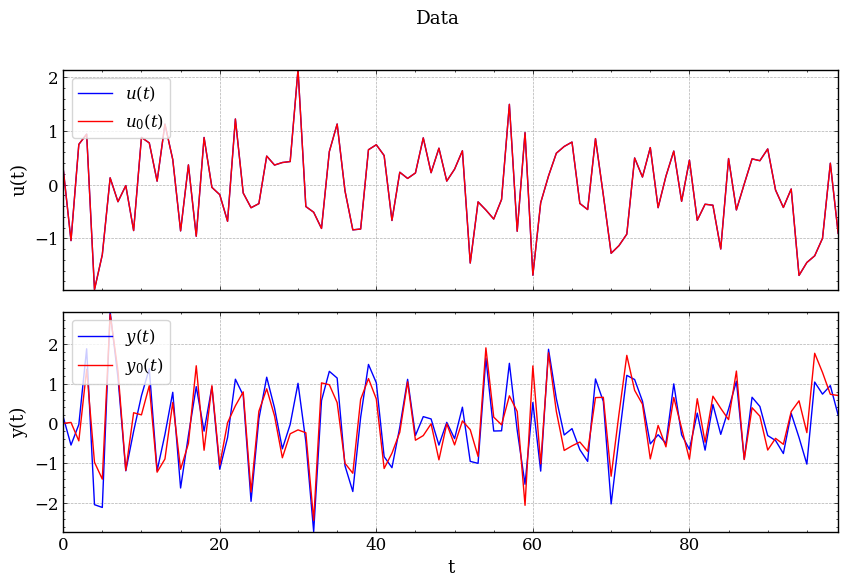

In [17]:
plot_realization(u0, y0, u, y, t=None)